#  Prediction_Energy Consumption 

## Dataset Description:
#### The "Household Power Consumption" dataset contains measurements of electric power consumption in a single household over a period of time. The data includes details recorded every minute from December 2006 to November 2010. Here's a detailed description of each column:

## Dataset Overview:
##### Rows: 2,075,259 (entries/records)
##### Columns: 9 (attributes/features)
##### Time Period: December 2006 - November 2010
##### Granularity: Data is recorded every minute.
### Column Descriptions:

##### Date (object):

The date of the observation in the format DD/MM/YYYY.

##### Time (object):

The time of the observation in the format HH:MM:SS.


##### Global_active_power:

Household global active power in kilowatts (kW).
This refers to the total power consumed by the household appliances.

##### Global_reactive_power: 

Household global reactive power in kilovolt-amperes reactive (kVAR).
Reactive power is the portion of electricity that establishes and sustains the electric and magnetic fields of alternating current equipment (not useful power).

##### Voltage (object initially; should be numeric):

Voltage (in volts) supplied to the house during the given minute.

##### Global_intensity (object initially; should be numeric):

Current intensity in amperes (A).
The total electrical current being drawn at that moment.

##### Sub_metering_1 (object initially; should be numeric):

Energy sub-metering for the kitchen (in watt-hours of active energy).
Example appliances: Dishwasher, oven, and microwave.

##### Sub_metering_2 (object initially; should be numeric):

Energy sub-metering for the laundry room (in watt-hours of active energy).
Example appliances: Washing machine, tumble dryer, refrigerator.

##### Sub_metering_3 (float64):
Energy sub-metering for electric water-heater and air-conditioning systems (in watt-hours of active energy)


#### The dataset contains a few missing values, particularly in the Sub_metering_3 column (about 1.25% of the data).

## Defining Problem Statement
The goal is to analyze the household electric power consumption dataset and extract meaningful insights. This could involve understanding consumption patterns, identifying peak usage times, and predicting future power consumption

### Import libraries and Load the dataset

In [141]:
import pandas as pd
import numpy as np

#### 2. Loading the Data

Use Pandas to load the dataset from the .txt file. Since it's delimited by ; , specify the separator

In [145]:
df=pd.read_csv(r"D:\infosys\household_power_consumption.txt",sep=";")
df

C:\Users\hi\AppData\Local\Temp\ipykernel_18856\3192474640.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"D:\infosys\household_power_consumption.txt",sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### 3.  Data Exploration
Check the shape and column information of the dataset to understand the data types and structure.

#### df.info() 
It Provides concise information about the DataFrame, including the number of non-null values, the data type of each column, and memory usage.

Total entries: Total number of rows.

Data types: Shows the data type of each column (e.g., int64, float64, object).

Null values: Indicates whether a column has missing values.

Memory usage: Gives an idea of how much memory the DataFrame is using

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Converting all columns to dtype

In [152]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'],errors = 'coerce')

df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


### df.head()
it Displays the first 5 rows of the DataFrame by default, though you can specify any number of rows to display.

usage:

Gives a quick look at the first few rows of the dataset.

it also Helps to verify if the data was loaded correctly and whether the columns are in the expected format

In [155]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### df.tail()
it Displays the last 5 rows of the DataFrame by default, but you can specify the number of rows.

usage:

it  Helps to inspect the most recent or last entries in the dataset, which can be useful for time-series data to ensure data continuity.

In [158]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## df.shape
It Provides the dimensions of the DataFrame as a tuple (rows, columns).

Quick check to know the number of rows and columns in the dataset
from the dataset we can observe there are 2075259 columns and 9 rows

In [161]:
df.shape

(2075259, 9)

### df.columns
Lists all column names in the DataFrame.

In [164]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### df.describe()
This function provides summary statistics for the numerical columns in the dataset.

###### Count: The number of non-null values.

##### Mean: The average of the column.

##### Standard Deviation (std): Shows how much the values deviate from the mean.

Min, 25th percentile, 50th percentile (median), 75th percentile, Max: These values help in understanding the spread and distribution of the data.

In [167]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### df.describe(include="object")

This function helps you analyze categorical or non-numeric data. When applied to object-type columns, it summarizes these columns by providing:

Count: The number of non-null entries in each column.

Unique: The number of unique values in the column.

Top: The most frequent (or "top") value in the column.

Freq: The frequency of the most common value (i.e., how often the "top" value appears)

In [170]:
df.describe(include="object")

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


### Checking for Null Values (df.isnull() and df.isnull().sum())
df.isnull() checks if there are any missing values in each cell, and df.isnull().sum() returns the number of missing values per column.

Usage:

To identify missing or null values that may need handling.

Useful to understand if imputation or dropping missing values is required for certain columns.

In [173]:
df.isnull().any()

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [175]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## null_percentage
This will help us to check the percentage of missing values for each column in the DataFrame

In [178]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64

### **Handling null values**

### Fill with the column's with mean 

choosing mean method to fill nan values

In [183]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


checking weather null values are present are not

In [186]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### 4. Data encoding

##### Converting date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.

In [191]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract year, month, day, hour, and minute from the 'Date_Time' column
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute 

df.tail()

C:\Users\hi\AppData\Local\Temp\ipykernel_18856\3645833626.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2


#### Finding whether the day is a holiday or not (0 = not holiday, 1= holiday)

In [274]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)


In [260]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


#### Find if the there is sunlight during the time given in the dataset ( 0600-1800 hours) is 1 (light is there) else 0)

In [266]:
# Create a new column 'Is_Daylight' based on the hour in 'Date_Time'
df['Is_Daylight'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

# Display the last few rows to confirm
df.tail()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time,Year,Month,Day,Hour,Minute,Is_holiday,Light,Is_Daylight
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0,0


## 5.Data Visualization

### Question 1: How does energy consumption vary over time?

##### 1. Line Plot of Energy Consumption Over Time

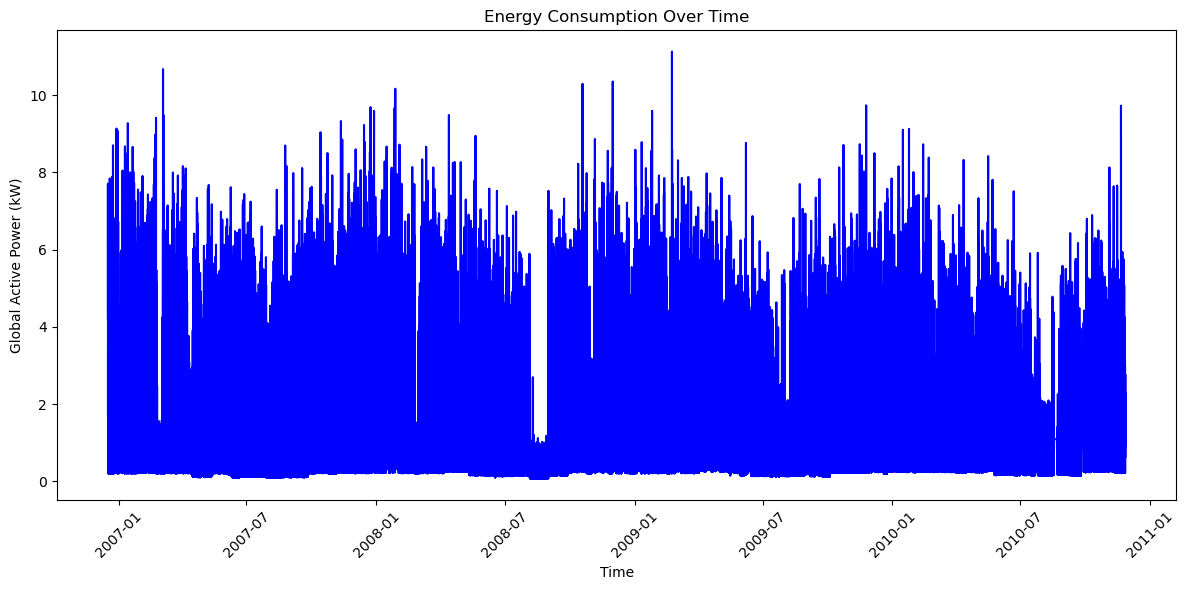

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date_Time'], df['Global_active_power'], color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows consistent energy consumption from 2007 to 2011 with regular peaks, likely due to seasonal or daily patterns. Sharp drops, particularly in mid-2008 and mid-2010, suggest anomalies or maintenance periods. Overall, energy usage remains stable with frequent fluctuations but no clear upward or downward trend.

### Question2: What is the distribution of power usage for different sub-metering zones?

#### 2. Box Plot of Power Usage for Different Sub-Metering Zones

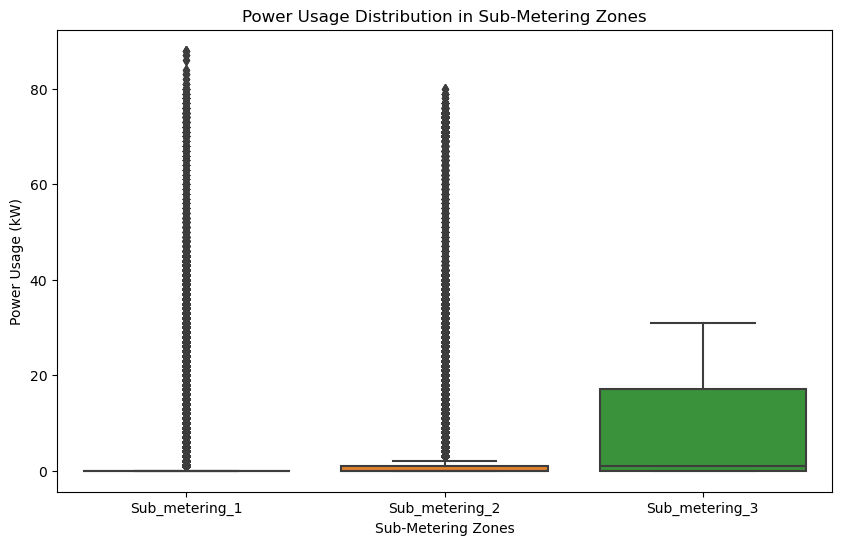

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title('Power Usage Distribution in Sub-Metering Zones')
plt.ylabel('Power Usage (kW)')
plt.xlabel('Sub-Metering Zones')
plt.show()


This distribution pattern suggests that Sub_metering_3 might be used for devices or areas with more consistent power needs, while Sub_metering_1 and Sub_metering_2 might be associated with less frequently used or intermittent high-power equipment.

### Question3: What is the distribution of global active power usage?

 Histogram of Global Active Power Consumption

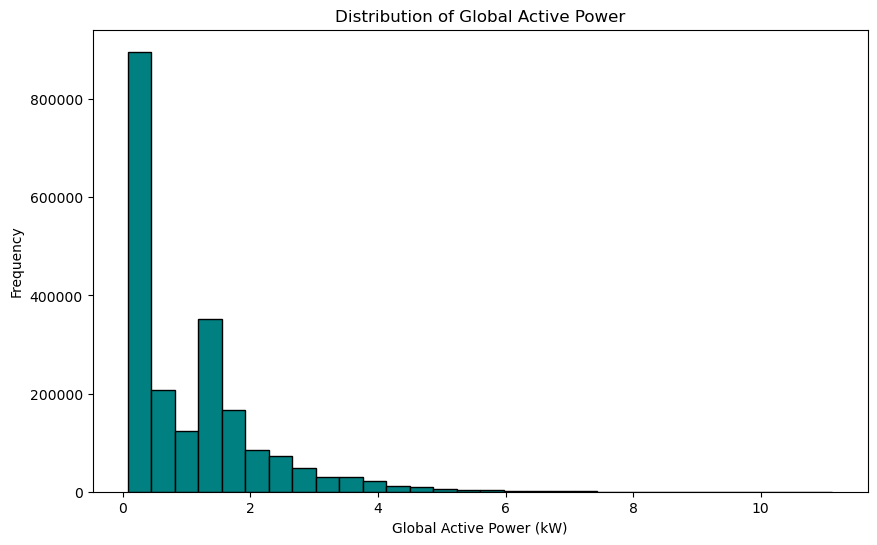

In [229]:
plt.figure(figsize=(10, 6))
plt.hist(df['Global_active_power'], bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()


The histogram shows that most global active power values are low, with a right-skewed distribution. High power usage values are rare, indicating occasional peak demands.

### Question 4: Is there a correlation between active and reactive power consumption?

Scatter Plot of Active vs. Reactive Power Consumption

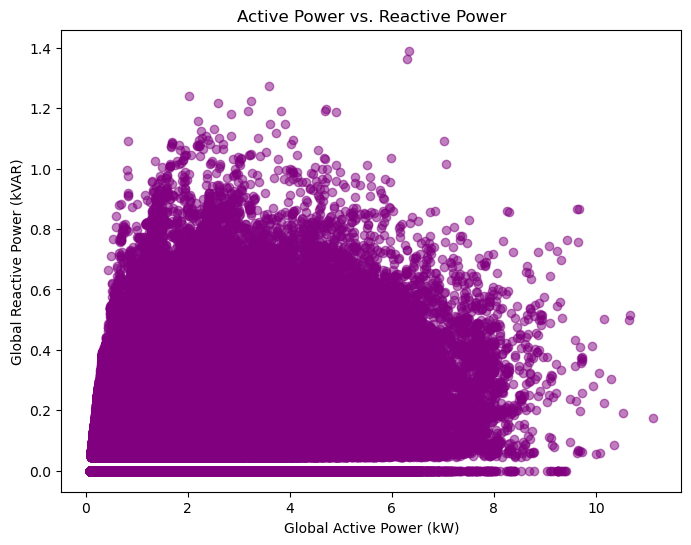

In [234]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Global_reactive_power'], color='purple', alpha=0.5)
plt.title('Active Power vs. Reactive Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kVAR)')
plt.show()


The scatter plot shows a positive correlation between global active power and global reactive power. As active power increases, reactive power generally increases as well, but with considerable spread, especially at higher active power levels.

### Question 5 What is the proportion of energy usage across the three sub-metering zones (Sub_metering_1, Sub_metering_2, and Sub_metering_3)?

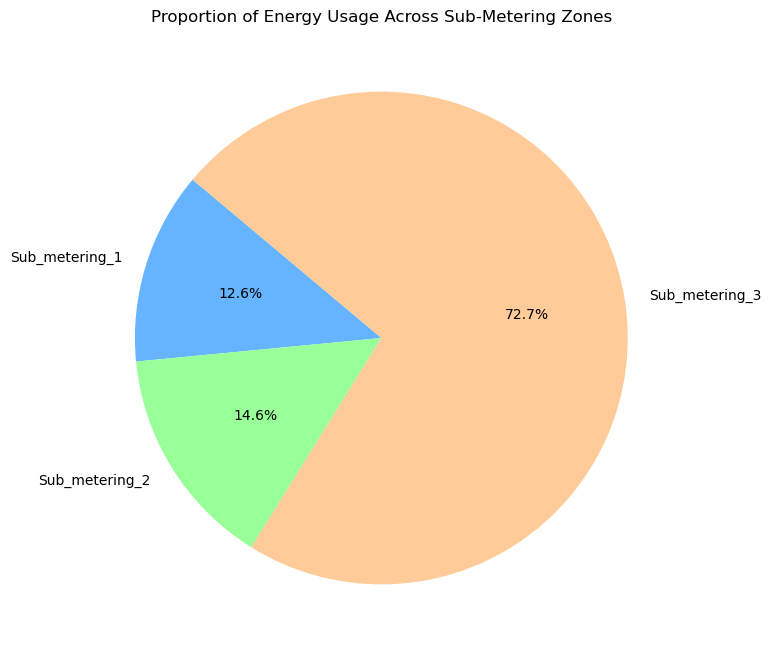

In [238]:
import matplotlib.pyplot as plt

# Calculate total energy usage for each sub-metering zone
sub_metering_totals = [
    df['Sub_metering_1'].sum(),
    df['Sub_metering_2'].sum(),
    df['Sub_metering_3'].sum()
]

# Labels for each sub-metering zone
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Energy Usage Across Sub-Metering Zones')
plt.show()


Sub_metering_3 typically has the largest share of energy usage, which may indicate a consistent load in that zone.
Sub_metering_1 and Sub_metering_2 often consume less energy compared to Sub_metering_3, possibly because they serve devices or areas with lower or less frequent usage.

### Question 6:What are the relationships and potential correlations among Active Power, Reactive Power, and Voltage in the dataset?

C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


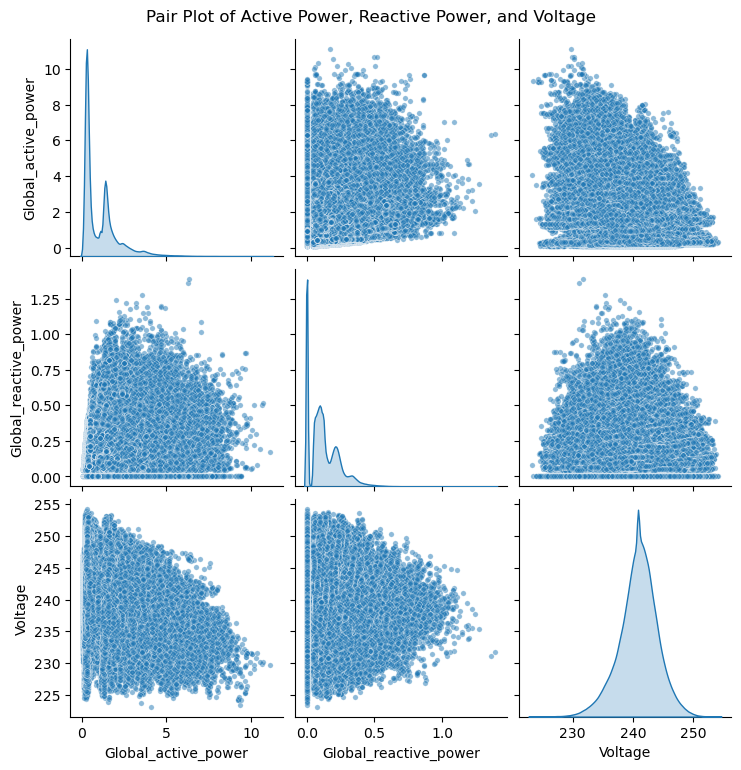

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns for the pair plot
columns_of_interest = ['Global_active_power', 'Global_reactive_power', 'Voltage']

# Creating the pair plot
sns.pairplot(df[columns_of_interest], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle('Pair Plot of Active Power, Reactive Power, and Voltage', y=1.02)  # Adjust the title position
plt.show()


Global Active Power and Global Reactive Power are somewhat interdependent, while Voltage is relatively stable but may decrease slightly as power consumption (active or reactive) increases.